# Ejercicios de repaso de Pandas

En este notebook vamos a repasar algunos conceptos de Pandas. Este notebook est'a vac'io, pero viene acompanhado de otro notebook con todas las soluciones.

**Es extremadamente importante evitar consultar las soluciones hasta que no hayas terminado los ejercicios en este notebook**. Las soluciones pueden parecer sencillas cuando las ves, pero sacarlas por uno mismo puede ser mucho m'as dif'icil. **Por favor, solo consulta las soluciones si no puedes avanzar despu'es de varios intentos**.

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Datos

Los datos se encuentran en el directorio `data`. Se trata de un fichero CSV, usando comas como separador, y con los nombres de las columnas en la primera fila.

*Puedes intentar usar la shell antes para comprobar c'omo es el fichero*.

**Ejercicio:** Usa la shell antes de cargar el CSV para comprobar c'omo de grande es. **Es posible cargar todo el fichero en memoria?**

In [2]:
# En esta celda carga el fichero CSV en un data frame de pandas
# Usa el tabulador en iPython para autocompletar el nombre del fichero CSV dentro del directorio data
# Cambia el None de abajo por el c'odigo necesario
!cd data
!cat weather_year.csv | wc -l
d=pd.read_csv("weather_year.csv",sep=',')
len (d)
len(d.columns)

367


23

## El dataframe

**Ejercicio**: Cu'antas filas tiene el dataframe? Y cu'antas columnas?

*Soluci'on*: 366 filas y 23 columnas

In [3]:
# Sustituye los 0 por el c'odigo necesario para averiguar el n'umero de filas y columnas
NUMERO_FILAS =len (d)
NUMERO_COLUMNAS = len(d.columns)

print "El data frame tiene %d filas y %d columnas" % (NUMERO_FILAS, NUMERO_COLUMNAS)

El data frame tiene 366 filas y 23 columnas


## Transformar los datos

Los datos de la columna EDT parecen ser fechas, pero sin embargo no se han le'ido como fechas al cargar el data frame.

**Ejercicio**: Comprueba de qu'e tipo son los datos incluidos en la columna EDT. **Vuelve a leer el dataframe (sobre-escribiendo la variable d) para que los datos sea lean como una fecha**.

In [10]:
d=pd.read_csv("weather_year.csv",sep=',',parse_dates=['EDT'])
d.dtypes


EDT                           datetime64[ns]
Max TemperatureF                       int64
Mean TemperatureF                      int64
Min TemperatureF                       int64
Max Dew PointF                         int64
MeanDew PointF                         int64
Min DewpointF                          int64
Max Humidity                           int64
 Mean Humidity                         int64
 Min Humidity                          int64
 Max Sea Level PressureIn            float64
 Mean Sea Level PressureIn           float64
 Min Sea Level PressureIn            float64
 Max VisibilityMiles                   int64
 Mean VisibilityMiles                  int64
 Min VisibilityMiles                   int64
 Max Wind SpeedMPH                     int64
 Mean Wind SpeedMPH                    int64
 Max Gust SpeedMPH                   float64
PrecipitationIn                       object
 CloudCover                            int64
 Events                               object
 WindDirDe

Para comprobar que los datos se han le'ido correctamente como una fecha, obt'en el anho, mes y semana (semana dentro del anho, de 1 a 52) de la fecha que est'a en la cuarta fila en la columna EDT

*Soluci'on*: 2012, 3 y 11

In [13]:
# Cambia los 0 por el c'odigo correspondiente
anho = d['EDT'][4].year                        
mes =  d['EDT'][4].month  
semana =  d['EDT'][4].weekofyear  

print "Anho: %d   Mes: %d   Semana: %d" % (anho, mes, semana)

Anho: 2012   Mes: 3   Semana: 11


## Renombrar columnas

Vamos a cambiar los nombres de todas las columnas para que sean m'as sencillo manejarlas

In [13]:
d.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew",
                "mean_dew", "min_dew", "max_humidity", "mean_humidity",
                "min_humidity", "max_pressure", "mean_pressure",
                "min_pressure", "max_visibilty", "mean_visibility",
                "min_visibility", "max_wind", "mean_wind", "min_wind",
                "precipitation", "cloud_cover", "events", "wind_dir"]

## Propiedades de las columnas

Obt'en la media, desviaci'on est'andar, m'inimo y m'aximo, y los cuartiles de la columna mean_temp

Hay un m'etodo para dataframes y columnas de dataframes (series) que te permite obtener todos esos valores de una vez. **Puedes encontrar qu'e m'etodo es?**

*Soluci'on*:
mean      55.683060
std       18.436506
min       11.000000
25%       41.000000
50%       59.000000
75%       70.750000
max       89.000000

In [25]:
d['mean_temp'].describe()

count    366.000000
mean      55.683060
std       18.436506
min       11.000000
25%       41.000000
50%       59.000000
75%       70.750000
max       89.000000
Name: mean_temp, dtype: float64

In [26]:
d.describe()

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,mean_pressure,min_pressure,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,cloud_cover,wind_dir
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,366.000000,366.000000
mean,66.803279,55.683060,44.101093,49.549180,44.057377,37.980874,90.027322,67.860656,45.193989,30.108907,30.022705,29.936831,9.994536,8.732240,5.797814,16.418033,6.057377,22.764384,2.885246,189.704918
std,20.361247,18.436506,17.301141,16.397178,16.829996,17.479449,9.108438,9.945591,15.360261,0.172189,0.174112,0.182476,0.073821,1.875406,3.792219,5.564329,3.200940,8.131092,2.707261,94.045080
min,16.000000,11.000000,1.000000,0.000000,-3.000000,-5.000000,54.000000,37.000000,15.000000,29.640000,29.420000,29.230000,9.000000,2.000000,0.000000,6.000000,0.000000,7.000000,0.000000,1.000000
25%,51.000000,41.000000,30.000000,36.000000,30.000000,24.000000,85.000000,61.250000,35.000000,29.990000,29.910000,29.830000,10.000000,8.000000,2.000000,13.000000,4.000000,17.000000,0.000000,131.000000
50%,69.000000,59.000000,47.000000,54.500000,48.000000,41.000000,93.000000,68.000000,42.000000,30.100000,30.020000,29.940000,10.000000,10.000000,6.000000,16.000000,6.000000,22.000000,2.000000,192.500000
75%,84.000000,70.750000,57.750000,62.000000,57.000000,51.000000,96.000000,74.000000,54.000000,30.210000,30.127500,30.040000,10.000000,10.000000,10.000000,20.000000,8.000000,26.000000,5.000000,259.750000
max,106.000000,89.000000,77.000000,77.000000,72.000000,71.000000,100.000000,95.000000,90.000000,30.600000,30.480000,30.440000,10.000000,10.000000,10.000000,39.000000,19.000000,63.000000,8.000000,360.000000


Ahora vamos a dibujar la evoluci'on de mean_temp.

Extrae la columna mean_temp e intenta usar el m'etodo plot sobre ella

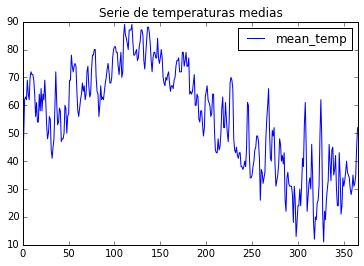

In [27]:
d.plot (kind='line',y='mean_temp',title='Serie de temperaturas medias')

En el eje horizontal se incluye el 'indice de la serie, que en este caso es un n'umero autocorrelativo.

Vamos a sustituir el 'indice del dataframe por la columna date, de manera que ahora la fecha sea el 'indice, y por tanto se dibuje en el eje horizontal.

In [14]:
d.index = d.date

Comprueba que ahora al dibujar la columna mean_temp, en el eje horizontal vemos la fecha en vez del 'indice autocorrelativo

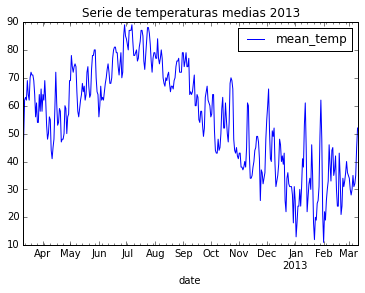

In [29]:
d.plot (kind='line',y='mean_temp',title='Serie de temperaturas medias 2013')

Sin embargo, ahora el dataframe tiene a la vez el 'indice y la columna date con los mismos valores. La columna date es redundante. **Podr'ias eliminarla?**

Ten cuidado, porque al eliminar una columna no act'uas sobre el dataframe, sino que obtienes una copia del dataframe con la columna eliminada. No necesitamos el dataframe original, as'i que sobre-escribe d con el nuevo dataframe sin la columna date.

In [15]:
d=d.drop("date",axis=1)

Al usar plot, obtenemos un gr'afico de la serie temporal de la columna mean_temp. Vamos ahora a dibujar un histograma de esta columna, usando hist en vez de plot. **Intenta entender cu'al es la diferencia entre ambos gr'aficos. Por qu'e ya no aparece la fecha en el gr'afico? Qu'e valores se muestran en cada uno de los ejes?**
No aparece por que con el histograma solo estudiamos la frecuencia de cada uno de los valores de la temperatura
Cuando quieres observar una tendencia dentro del total de la  muestra con respecto a una característica de valores  continuos  (peso,altura...) 
**En qu'e situaciones es 'util un histograma?**
Cuando quieres observar una tendencia dentro del total de la  muestra con respecto a una característica de valores  continuos  (peso,altura...) 

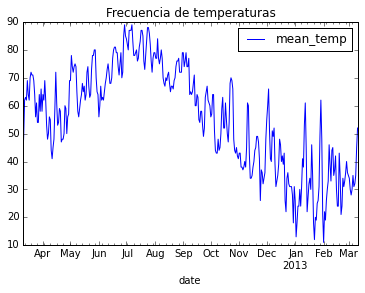

In [31]:
d.plot (kind='line',y='mean_temp',title='Frecuencia de temperaturas ')

Los valores de la temperatura estan en grados Farenheit, unas unidades que son dif'iciles de interpretar para la mayor'ia de nosotros.

Vamos a crear una columna mean_tempC que contenga los valores de mean_temp, pero transformados a grados cent'igrados, m'as f'aciles de interpretar para nosotros. Para ello haremos uso de la funci'on definida en la siguiente celda:

In [16]:
def f2c(f):
    c = (f-32)/1.8
    return c

Usa la funci'on para crear la columna adicional con los valores en grados cent'igrados (grados Celsius), de nombre **mean_tempC**

In [17]:
d["mean_tempC"]=d.mean_temp.apply(lambda x: f2c(x))

Dibuja ahora la serie temporal con esta nueva columna, usando plot. Incluye una rejilla (grid) en el gr'afico para que sea m'as f'acil de leer e interpretar

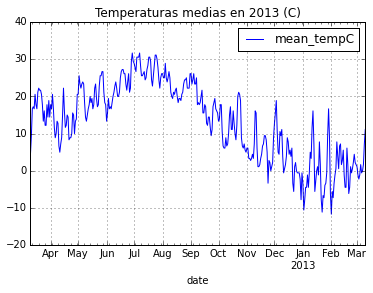

In [18]:
d.plot (kind='line',y='mean_tempC',title='Temperaturas medias en 2013 (C)',grid =True)

Dibuja ahora tambi'en un histograma de esta nueva columna. **Cu'al es el rango de temperaturas m'as frecuente en los datos?** de los 15 a los 20

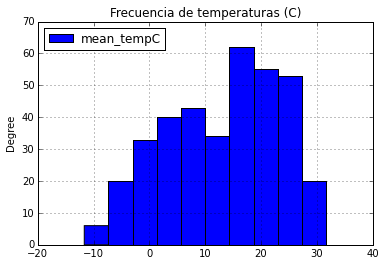

In [27]:
d.plot (kind='hist',y='mean_tempC',title='Frecuencia de temperaturas (C)',grid=True)

Como se puede ver en ambos gr'aficos, hay algunos d'ias con temperaturas bajo 0.

**En qu'e d'ia ocurri'o la temperatura m'as baja? Cu'al fue la temperature media ese d'ia?**

**Cu'antos d'ias de temperaturas bajo cero hay en los datos?**

*Soluci'on*: El 1 de febrero de 2013 con -11.67 C, 44 d'ias

In [44]:
len(d[d['mean_tempC']<0])

44

In [21]:
d[d['mean_tempC']==d['mean_tempC'].min()].index

DatetimeIndex(['2013-02-01'], dtype='datetime64[ns]', name=u'date', freq=None, tz=None)

En el dataframe tenemos tambi'en las columnas min_temp y max_temp, que est'an tambi'en en grados Farenheit.

Crea dos columnas nuevas min_tempC y max_tempC, que contengan las temperaturas en grados cent'igrados. Recuerda que tienes la funci'on f2c disponible.

In [22]:
d["min_tempC"]=d.min_temp.apply(lambda x: f2c(x))

In [24]:
d["max_tempC"]=d.max_temp.apply(lambda x: f2c(x))

Dibuja las series temporales de min_tempC, mean_tempC y max_tempC en una misma gr'afica con tres curvas de diferentes columnas y leyenda. Anhade una rejilla (grid) al gr'afico.

*Pista*: Si tienes un dataframe con la fecha en el 'indice y solo esas tres columnas, puedes usar el m'etodo plot del dataframe para obtener justo ese gr'afico. Intenta extraer solo las tres columnas del dataframe d

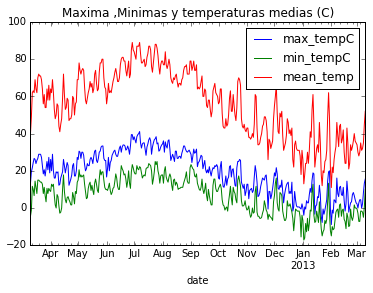

In [26]:
d.plot(kind='line',y=["max_tempC","min_tempC","mean_temp"],title='Máximas ,Mínimas y temperaturas medias (C)')

La columna precipitation contiene la cantidad de lluvias diarias. Pero tenemos un problema, no todos los datos son num'ericos. Obt'en los primeros diez valores de la columna precipitation y comprueba si existe alg'un valor no num'erico. **Qu'e valor no num'erico has encontrado?**

*Soluci'on*: Hay valores que contienen T

In [31]:
d['precipitation'].head(10)

date
2012-03-10    0.00
2012-03-11       T
2012-03-12    0.03
2012-03-13    0.00
2012-03-14    0.00
2012-03-15    0.04
2012-03-16       T
2012-03-17       T
2012-03-18       T
2012-03-19    0.00
Name: precipitation, dtype: object

Adem'as, el resto de datos de la columna se han interpretado como texto. **Usa la siguiente funci'on para crear una columna de nombre precipitationN que contendr'a los valores num'ericos**.

Lo que vamos a hacer es transformar en un n'umero si encontramos un valor num'erico, y en el caso de que encontremos T, el valor correspondiente ser'a 0.00. El valor T significa que en ese d'ia hubo trazas de lluvia. Es decir, llovi'o, pero muy poco, y no ha quedado registrado el volumen de precipitaci'on.

In [45]:
def precToN(p):
    if p == 'T':
        return 0.
    else:
        return double(p)

In [46]:

d['precipitationN']=d.precipitation.apply(lambda x:precToN(x))

Desde este momento, vamos a trabajar solo con las siguientes columnas:
* min_tempC
* mean_tempC
* max_tempC
* precipitationN

El 'indice del dataframe lo vamos a conservar tambi'en, para tener las fechas para dibujar diversos gr'aficos.

**Crea un dataframe de nombre w que contenga solo esas columnas, pero que conserve el 'indice de d**

In [48]:
w=d[['min_tempC',
    'mean_tempC',
    'max_tempC',
    'precipitationN']]

A modo de ejemplo, vemos c'omo realizar una nube de puntos relacionando precipitaci'on con la temperatura media.

Existen muchos gr'aficos que se pueden hacer directamente con Pandas y sus Series y Dataframes. Para m'as informaci'on, consulta la documentaci'on en http://pandas.pydata.org/pandas-docs/stable/visualization.html

**Llovi'o alg'un d'ia en los que la temperatura media era menor que 0?**

*Soluci'on*: S'i, algunos puntos con temperaturas negativas tienen precipitaciones positivas.

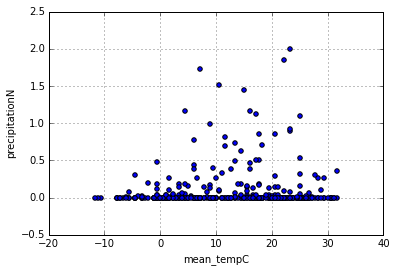

In [49]:
w.plot(kind='scatter',x='mean_tempC',y='precipitationN',grid=True)

En un pr'oximo ejercicio usaremos el dataframe w para realizar algunas operaciones de agrupaci'on y calcular los valores de precipitaci'on y temperature a nivel mensual.